# Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the Decision Tree for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([3., 2., 2., 0., 1., 2., 2., 2., 3., 4., 0., 1., 5., 2., 5., 4., 3.,
       1., 4., 2., 3., 2., 3., 2., 0., 2., 4., 5., 1., 5., 5., 3., 3., 2.,
       3., 3., 3., 5., 1., 0., 3., 2., 1., 3., 0., 3., 5., 3., 4., 4., 2.,
       2., 4., 5., 4., 1., 0., 1., 4., 4., 3., 2., 3., 5., 1., 3., 2., 5.,
       5., 3., 3., 4., 5., 2., 4., 2., 4., 5., 4., 1., 2., 3., 1., 5., 5.,
       2., 5., 0., 4., 2., 2., 5., 1., 1., 1., 1., 3., 2., 0., 3., 3., 3.,
       0., 1., 5., 4., 5., 4., 1., 0., 5., 4., 2., 3., 3., 5., 5., 5., 5.,
       5., 5., 2., 1., 2., 3., 4., 4., 3., 4., 5., 1., 1., 4., 3., 5., 0.,
       4., 1., 5., 3., 1., 1., 4., 1., 1., 3., 1., 1., 3., 4., 5., 4., 5.,
       2.])

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [0]:
df_heat

,original_values,Predicted_Values
0,3,3.0
1,2,2.0
2,2,2.0
3,0,0.0
4,1,1.0
...,...,...
149,4,4.0
150,5,5.0
151,4,4.0
152,5,5.0


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.006493506493506494

In [0]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.006493506493506494

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.08058229640253803

Text(0, 0.5, 'Heating Load')

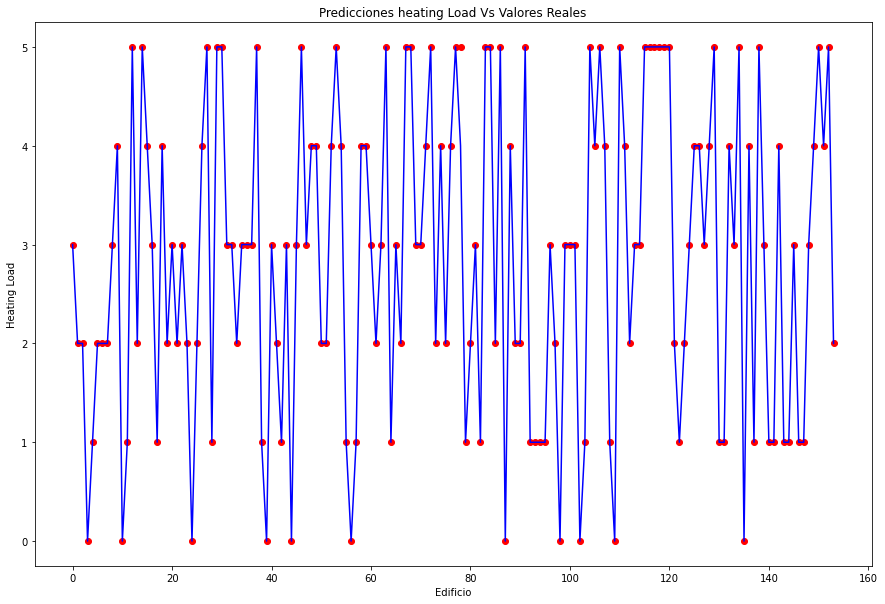

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

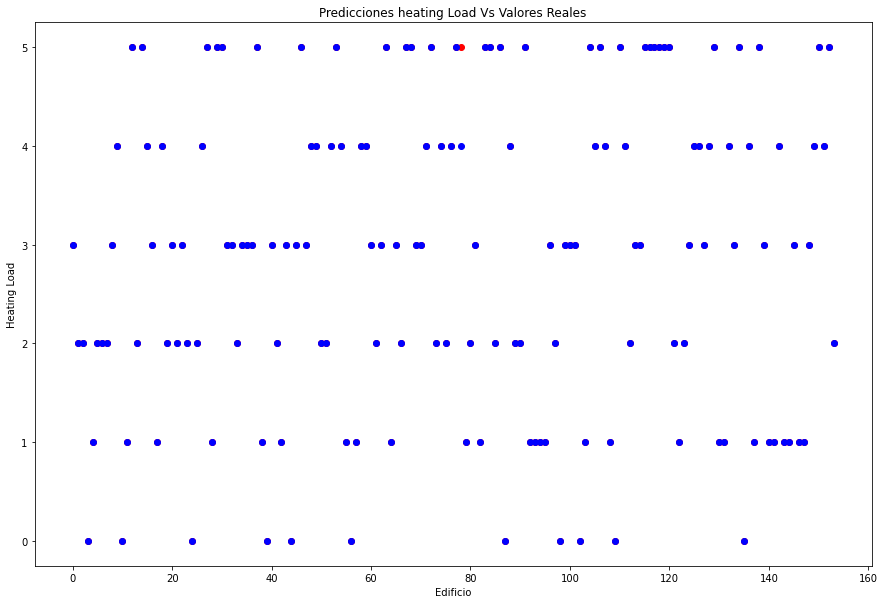

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the Decision Tree for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
cooling_regressor = DecisionTreeRegressor(random_state = 0)
cooling_regressor.fit(X_train_cooling, y_train_cooling)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
# Predicting the Test set results
y_pred_cooling = cooling_regressor.predict(X_test_cooling)
y_pred_cooling

array([15.16 , 10.46 , 35.48 , 17.41 , 32.26 , 28.83 , 28.15 , 29.49 ,
       28.4  , 22.8  ,  6.366, 42.62 , 11.34 , 42.74 , 41.09 , 25.37 ,
       10.68 , 29.14 , 14.61 , 12.45 , 12.91 , 32.69 , 10.66 , 40.19 ,
        6.01 , 14.7  , 13.   , 14.19 , 10.7  , 39.83 , 12.59 , 13.01 ,
       41.3  , 12.93 , 28.57 , 36.95 , 14.22 , 36.95 , 17.14 , 10.54 ,
       11.59 , 39.86 , 14.58 , 26.   , 19.68 , 24.31 , 10.67 , 12.95 ,
       28.05 , 32.15 , 32.49 , 13.   , 32.46 , 14.92 , 36.95 , 10.36 ,
       15.55 , 26.97 , 38.33 , 14.47 , 15.09 , 12.35 , 32.21 , 10.37 ,
       12.41 , 11.98 , 39.04 , 11.14 , 27.03 , 39.81 , 32.82 , 10.68 ,
       24.37 , 17.23 , 15.32 , 25.98 , 32.82 , 39.01 , 32.82 , 14.51 ,
       36.57 , 29.01 , 11.68 , 13.99 , 28.91 , 25.98 , 24.04 , 29.9  ,
       13.04 , 17.23 , 14.4  , 27.03 , 12.43 , 24.59 , 39.97 , 16.76 ,
       29.67 , 14.71 ,  7.1  , 36.86 , 36.97 , 23.75 , 19.95 , 32.12 ,
       10.37 , 28.4  , 41.09 , 13.02 , 12.41 , 15.55 , 18.19 , 32.46 ,
      

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [0]:
df_cooling

,original_values,Predicted_Values
0,15.18,15.16
1,10.32,10.46
2,37.26,35.48
3,16.95,17.41
4,32.26,32.26
...,...,...
149,14.33,13.91
150,28.15,28.15
151,11.33,11.42
152,13.86,13.99


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

0.40367503896103873

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

0.39996103896103896

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

0.6353542625661992

Text(0, 0.5, 'Cooling Load')

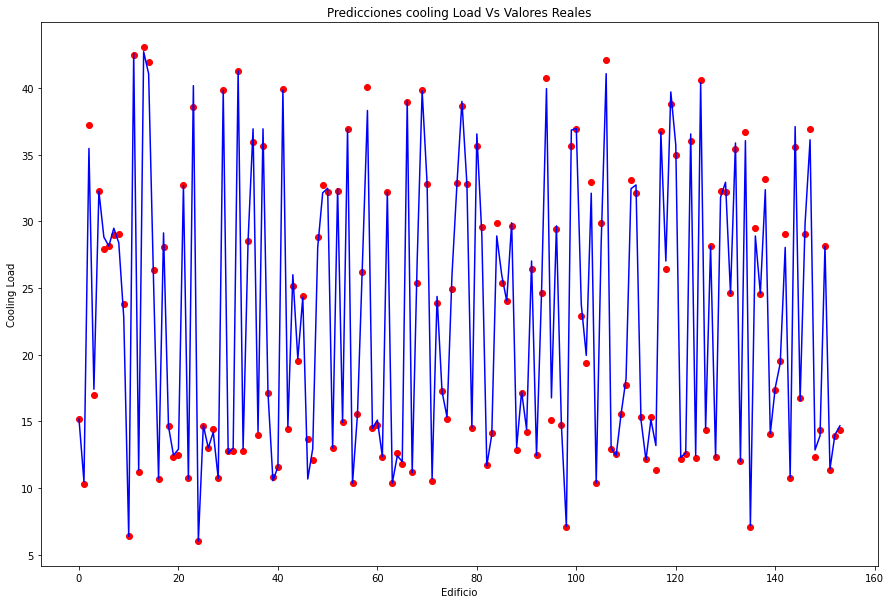

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

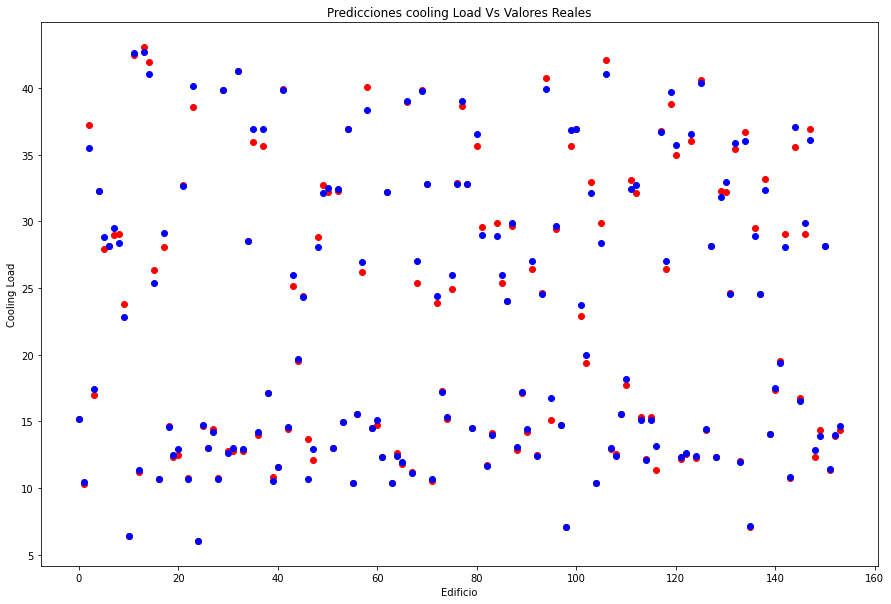

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')